<a href="https://colab.research.google.com/github/homare1998/my_test_lib/blob/main/GPyOpt_my_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ベイズ最適化のパッケージについて
## はじめに
ここではベイズ最適化についての説明は行わない。私はベイズ最適化のパッケージを使ってはいるが、某先輩のプログラムを私の実験用に書き換えるという形での利用が主であり、私も熟知しているわけではないので、間違いがあれば教えてほしい。
## GPyOpt
某先輩が使っているパッケージである。ざっくり言えば繰り返し試行を行うことで**評価値が最小**となるパラメータを返す。つまり最大値を求めたいときは$-1$をかけることで負の値にしてやる。
Qiitaなどを参考に進める。

In [2]:
! pip install GPy
! pip install gpyopt

     |████████████████████████████████| 959 kB 5.0 MB/s 
     |████████████████████████████████| 71 kB 7.8 MB/s 
  Created wheel for GPy: filename=GPy-1.10.0-cp37-cp37m-linux_x86_64.whl size=2565164 sha256=2ef45ccb624c070ec6a0c3b1f57fdff9b4e707915d6cf74e8fc2d5f2622a69ff
  Stored in directory: /root/.cache/pip/wheels/f7/18/28/dd1ce0192a81b71a3b086fd952511d088b21e8359ea496860a
  Created wheel for paramz: filename=paramz-0.9.5-py3-none-any.whl size=102565 sha256=374e7830a38b3e752ff936d96797e42ab7ce3cb252dc4272c429d84c5d1b78d5
  Stored in directory: /root/.cache/pip/wheels/c8/95/f5/ce28482da28162e6028c4b3a32c41d147395825b3cd62bc810
Successfully built GPy paramz
     |████████████████████████████████| 56 kB 2.5 MB/s 
  Created wheel for gpyopt: filename=GPyOpt-1.2.6-py3-none-any.whl size=83609 sha256=3fe902f6275f1c29fb4501cba1b6a8fda320f54f3616c49c541b833b4f06c4dc
  Stored in directory: /root/.cache/pip/wheels/e6/fa/d1/f9652b5af79f769a0ab74dbead7c7aea9a93c6bc74543fd3ec
Successfully built gp

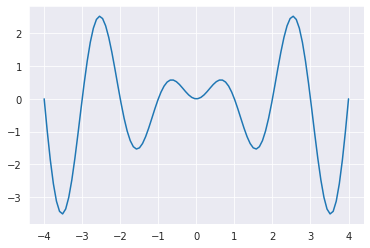

In [3]:
import GPy
import GPyOpt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('darkgrid')

"""
 generate dataset & plot
"""
func = lambda x :  x * np.sin(np.pi  *x)
x = np.linspace(-4, 4, 100)
y = func(x)
plt.plot(x, y)

'func'は評価値を返す関数である。  
次に最適化する変数の設定を行う。

In [4]:
bounds = [{'name':'x','type':'continuous','domain':(-4,4)}]

上は'x'という連続変数('continuous')を(-4,4)の範囲で最適化することを想定し設定したもの。  
また'type':'discrete'とすることで、'domain':数列　で指定した値のうちのどれかが選ばれる。

最後に評価関数と最適する変数の設定を渡して最適化を行う。その際に、max_iterという最大繰り返し回数を指定する必要がある。デフォルトでは10回繰り返す前に５回のランダムなサンプリングが行われる。

In [5]:
my_bopt = GPyOpt.methods.BayesianOptimization(f=func, domain=bounds)
my_bopt.run_optimization(max_iter=10)

最適化されたパラメータは次で取得できる

In [6]:
print(my_bopt.x_opt)

[-3.50670673]


またそのときのスコアは次で取得できる。

In [7]:
print(my_bopt.fx_opt)

-3.5059283825746004


ガウス過程回帰に基づいた現在の目的関数の事後確率と次にサンプリングするポイントを示すには次の関数を用いる。赤の縦線が引かれているポイントが次にサンプリングを行うポイントである。  
(自分の環境ではコピペのはずなのに何故かよくわからないエラーが出てます。)

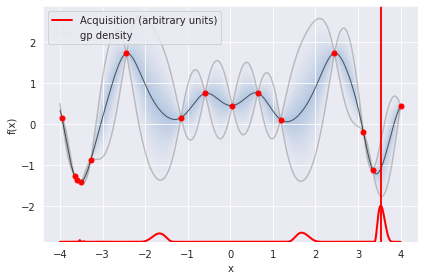

In [8]:
my_bopt.plot_acquisition()

試行回数ごとの収束状況を確認するには次の関数を用いる。

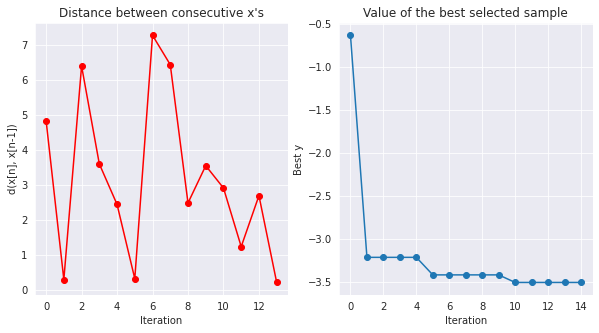

In [9]:
my_bopt.plot_convergence()

## 以下は先輩のプログラムで使われているオプションを中心に説明する。

In [13]:
def func(x):
    result = -(x[0,0]**2+2*x[0,0]*x[0,1]+x[0,1]**2*np.sin(-x[0,1]-x[0,1]))
    return result

constraints = [{'name':'constraints_test', 'constraint':'-40 + 2*x[:,0]*x[:,1]'}]
initial_exp_num = 5

bounds = [{'name': 'x', 'type': 'continuous', 'domain': (-4, 5)},
          {'name': 'y', 'type': 'continuous', 'domain': (-4, 5)}]

myBopt = GPyOpt.methods.BayesianOptimization(f=func,
                                            domain=bounds,
                                            constraints=constraints,
                                            initial_design_numdata=initial_exp_num,
                                            initial_design_type='random',
                                            acquisition_type='LCB')

'constraints'で制約条件を示すことができる。("contraint"以降の式が<=0という制約)  
'initial_design_numdata'は最初にサンプリングを行う回数で、デフォルトでは５である。また'initial_design_type'はそのサンプリング方法を指定する。

次に初期条件として事前に取得したデータを与える方法を示す。これを利用することで、実験が途中で停止した場合でも続きから行うことができると思われる。  
まずは初期条件を与えない場合を示す。

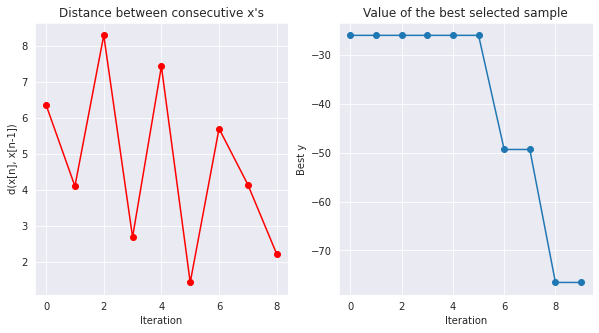

[5.         3.97092612 0.02129224]
-76.56169760914429


In [12]:
import numpy as np
import matplotlib.pyplot as plt
import GPyOpt

def func(x):
    result = -(x[0,0]**2+2*x[0,0]*x[0,1]+x[0,1]**2*np.sin(-x[0,1]-x[0,2])-x[0,2]**2)
    return result

bounds = [{'name': 'x', 'type': 'continuous', 'domain': (-4, 5)},
          {'name': 'y', 'type': 'continuous', 'domain': (-4, 5)},
          {'name': 'z', 'type': 'continuous', 'domain': (-4, 5)}]

my_bopt = GPyOpt.methods.BayesianOptimization(f=func,domain=bounds)
my_bopt.run_optimization(max_iter=5)
my_bopt.plot_convergence()
print(my_bopt.x_opt)
print(my_bopt.fx_opt)

次に初期条件として３つのデータを与えたときを示す。(initial_design_numdata よりデータ数が大きくてもエラーは出ない)

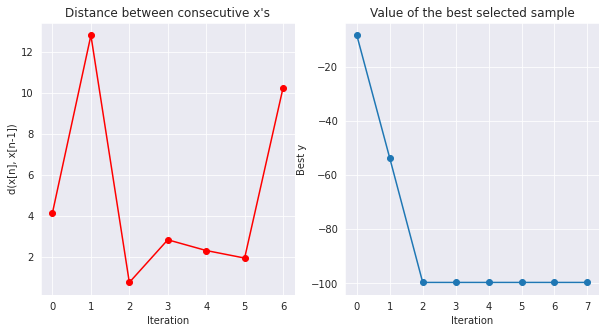

[ 5.          5.         -0.12124614]
-99.6401306879605


In [14]:
import numpy as np
import matplotlib.pyplot as plt
import GPyOpt

def func(x):
    result = -(x[0,0]**2+2*x[0,0]*x[0,1]+x[0,1]**2*np.sin(-x[0,1]-x[0,2])-x[0,2]**2)
    return result

bounds = [{'name': 'x', 'type': 'continuous', 'domain': (-4, 5)},
          {'name': 'y', 'type': 'continuous', 'domain': (-4, 5)},
          {'name': 'z', 'type': 'continuous', 'domain': (-4, 5)}]

best_answer_x = np.array([[0.1207563,-3.57082306,1.66598575],[-4,-4,1.35367607],[5,5,-0.12124614]])
best_answer_y = np.array([[-8.42265506610926],[-53.77185068942093],[-99.6401306879605]])

my_bopt = GPyOpt.methods.BayesianOptimization(f=func,X = best_answer_x,Y = best_answer_y,initial_design_numdata= 2 ,domain=bounds)
my_bopt.run_optimization(max_iter=5)
my_bopt.plot_convergence()
print(my_bopt.x_opt)
print(my_bopt.fx_opt)

カーネル関数の設定は以下でできる。（カーネル関数の設定については、まだ使用できるが次のバージョンでは非推奨とのこと。なお、これで本当にカーネルを設定できているかの確認はできていない。）

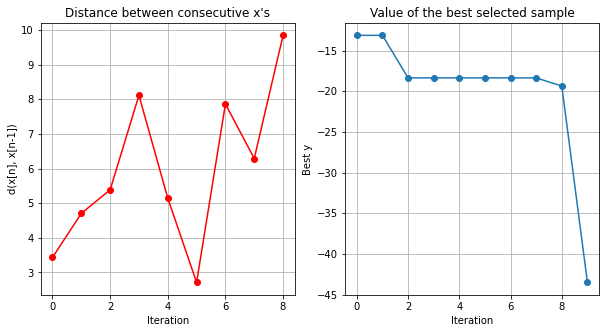

[ 5.          3.28447128 -2.24617499]
-43.50532556373741


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import GPyOpt
import GPy

def func(x):
    result = -(x[0,0]**2+2*x[0,0]*x[0,1]+x[0,1]**2*np.sin(-x[0,1]-x[0,2])-x[0,2]**2)
    return result

bounds = [{'name': 'x', 'type': 'continuous', 'domain': (-4, 5)},
          {'name': 'y', 'type': 'continuous', 'domain': (-4, 5)},
          {'name': 'z', 'type': 'continuous', 'domain': (-4, 5)}]

my_bopt = GPyOpt.methods.BayesianOptimization(kernel = GPy.kern.Matern52(input_dim=len(bounds), ARD=True),f=func,domain=bounds)
my_bopt.run_optimization(max_iter=5)
my_bopt.plot_convergence()
print(my_bopt.x_opt)
print(my_bopt.fx_opt)